<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 2</h2></center>
<center><h3>Fundamentos: Análisis espectral</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Javier Brito Parra</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Carga archivos y carga datos en python
<p align="justify">
Una de las tareas más importantes es la de cargar archivos que incluyan datos para el procesamiento.

<p align="justify">
Debes cargar los dos archivos en formato txt y CSV, adquirir los datos y presentarlos en graficos usando la librería Matplotlib
    
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Se utiliza la libreria de pandas para leer los archivos dentro de folder o directorio.

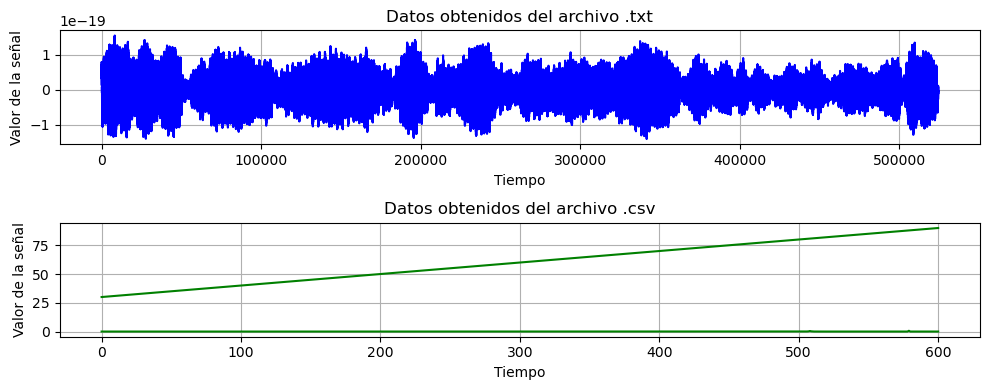

In [2]:
load_txt = np.loadtxt('H-H1_GWOSC_16KHZ_R1-1268431079-32.txt')
## Comando de panda para leer un archivo en formato txt
load_excel = pd.read_csv('AbsorbanceTE_0-0.csv')
## Comando de panda para leer un archivo en formato csv


plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)  
plt.plot(load_txt,'b')
plt.title('Datos obtenidos del archivo .txt')
plt.xlabel('Tiempo')
plt.ylabel('Valor de la señal')
plt.grid(True)

plt.subplot(2, 1, 2)  
plt.plot(load_excel,'g')
plt.title('Datos obtenidos del archivo .csv')
plt.xlabel('Tiempo')
plt.ylabel('Valor de la señal')

plt.grid(True)
plt.tight_layout()  
plt.show()

## 2. Señal
<p align="justify">
Crea una señal continua (la suma de dos senoidales/cosenoidales, exponenciales) que utilizaras para las demostraciones siguientes. Presenta la función que usaste en una gráfica de tal forma que la ecuación esté incluida en dicha gráfica.

Incluye la ecuación en una celda de tu notebook usando LATEX.


### 2. Ecuacion de la señal periodica en LATEX:

$$y(t) = 2\cos(2\pi f t)+\frac{1}{2}\cos^2(2\pi f t)+0.5\sin^4(4\pi f t)$$

### 2. Grafica de la señal:

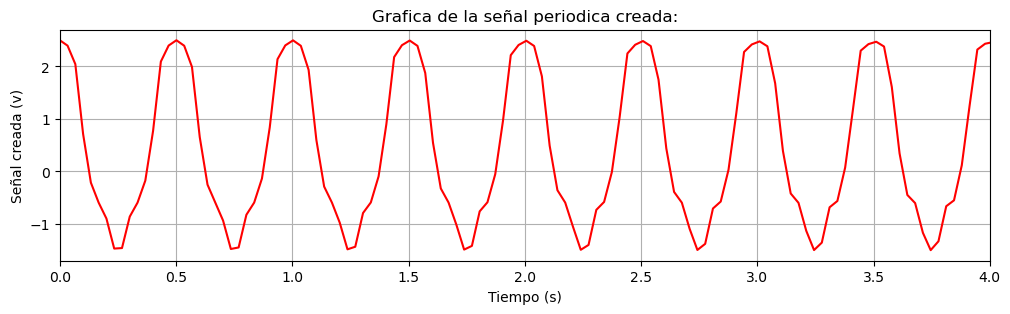

In [3]:
def fun_ownsignal(t,f):
    return 2*np.cos((t*f*2*np.pi))+(1/2)*(np.cos(t*f*2*np.pi))**2+0.5*np.sin(t*4*np.pi*f)**4
    
t = np.linspace(0,10,300)

plt.figure(figsize=(12,3))
plt.title("Grafica de la señal periodica creada:")
plt.plot(t,fun_ownsignal(t,2),color='red')
plt.xlabel("Tiempo (s)")
plt.ylabel("Señal creada (v)")
plt.grid(True)
plt.xlim(0,4)
plt.show()

## 3. Sampleo
<p align="justify">
En este punto debes comprobar como se da la operación de sampleo y que sucede ante cambios en el intervalo de sampleo.    


### 3.1 Crea una señal impulso (delta) y desplazala
Para esto puedes usar alguna librería de python

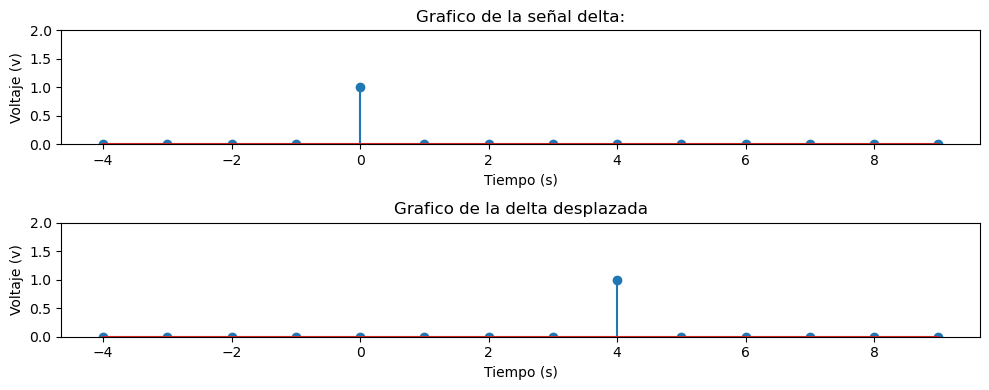

In [4]:
def impulso(t, pos):
    return np.where(t == pos, 1, 0)

t_vector = np.arange(-4, 10)  ## Rango de tiempo
t_pos = 0  # Posicion donde se centra el impulso

delta = impulso(t_vector, t_pos)

desp = 4 ## El valor del desplazamiento en el eje del tiempo
t_pos = t_pos + desp ## Posicion + 4
delta_desp=impulso(t_vector, t_pos)

plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.title("Grafico de la señal delta:")
plt.stem(t_vector,delta)
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (v)")
plt.ylim(0,2)

plt.subplot(2,1,2)
plt.title("Grafico de la delta desplazada")
plt.stem(t_vector,delta_desp)
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (v)")
plt.ylim(0,2)

plt.tight_layout()
plt.show()

### 3.2 Genere una señal Senoidal y realice la operación de sampleo
Puedes utilizar el método "stem" de matplotlib para plotear el resultado.

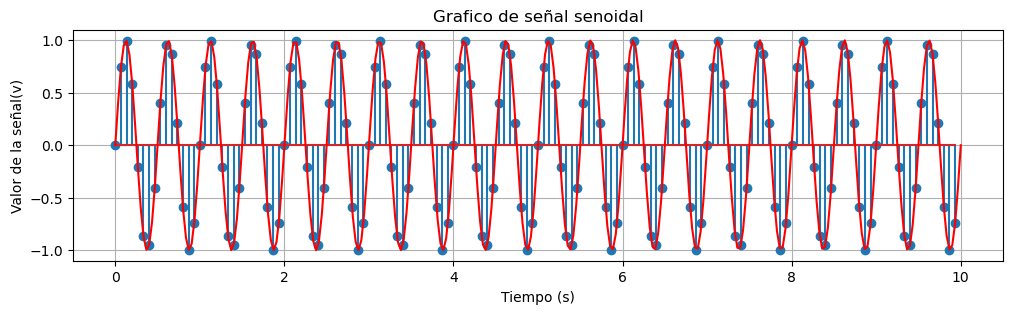

In [5]:
def fun_sin(t,f,phi):
    return np.sin(t*f*2*np.pi+phi) 

Fs = 15 

Ts = 1/Fs ## Periodo de muestreo (Hz)

sampleo = np.arange(0,10,Ts) 
## Vector desde 0 hasta 10 en Ts pasos,

sin_sampleo = fun_sin(sampleo,2,0)
## Funcion Sampleada con f = 2 (Hz)

plt.figure(figsize=(12,3))
plt.title("Grafico de señal senoidal")
plt.stem(sampleo ,sin_sampleo)
plt.plot(t,fun_sin(t,2,0),'r')
plt.ylabel("Valor de la señal(v)")
plt.xlabel("Tiempo (s)")
plt.grid(True)
plt.show()

### 3.3 Genere una señal Triangular y realice la operación de sampleo

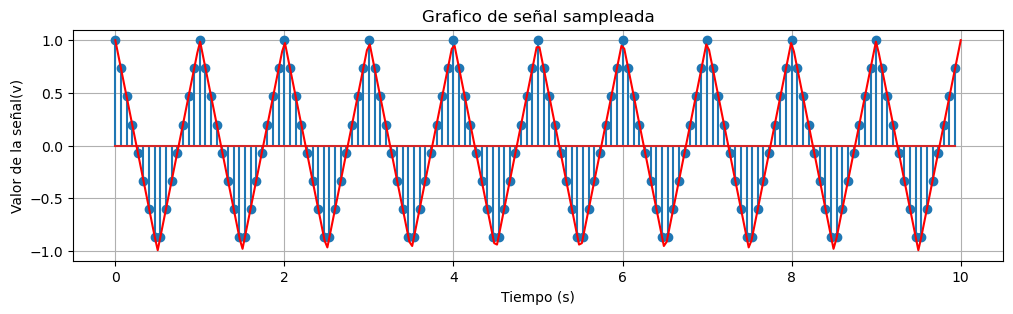

In [6]:
def fun_triangular(t,amplitud, periodo):
    return amplitud*(2*np.abs((t*periodo)%1 - 0.5))-1

triang_sampleo = fun_triangular(sampleo,2,1)
## Funcion Sampleada con f = 1 (Hz)

plt.figure(figsize=(12,3))
plt.title("Grafico de señal sampleada")
plt.stem(sampleo ,triang_sampleo)
plt.plot(t,fun_triangular(t,2,1),'r')
plt.ylabel("Valor de la señal(v)")
plt.xlabel("Tiempo (s)")
plt.grid(True)
plt.show()


### 3.4 Realice la operación de sampleo sobre la señal que generaste en el punto 2

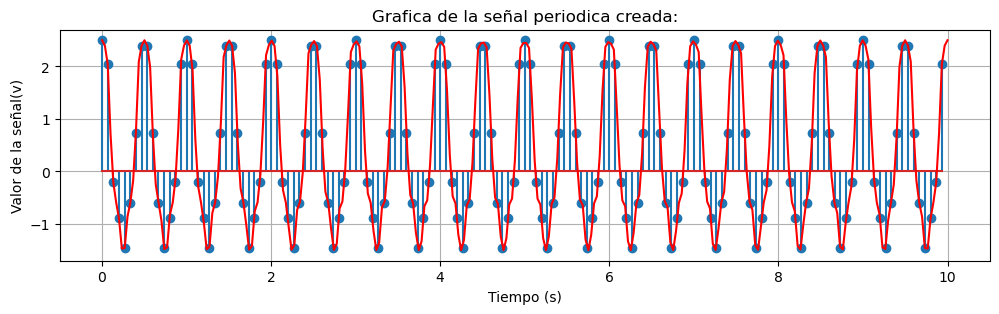

In [7]:
fun_own_samp = fun_ownsignal(sampleo,2)
plt.figure(figsize=(12,3))
plt.title("Grafica de la señal periodica creada:")
plt.stem(sampleo,fun_own_samp)
plt.plot(t,fun_ownsignal(t,2),'r')
plt.ylabel("Valor de la señal(v)")
plt.xlabel("Tiempo (s)")
plt.grid(True)
plt.show()

### 3.5 Compruebe el teorema de Nyquist
Para comprobarlo, debes evaluar algunos casos:
1. la frecuencia de sampleo _f_ es mayor que la frecuencia máxima de tu señal, Fmax.
2. la frecuencia de sampleo _f_ es mayor que 2*Fmax.
3. la frecuencia de sampleo _f_ es mayor que 5*Fmax. 

<p align="justify">
Debe graficar:

1. la señal original.
2. la señal sampleada.
3. la señal reconstruida a partir del sampleo.

### 3.5 Desarrollo de la actividad:

* Primero se grafica la transformada de fourier de la señal para encontrar su Fmax.

In [8]:
fs = 100
señal_creada_fft = np.fft.fft(fun_ownsignal(t,2))         ## Se hace la transformada de fourier a la señal creada.
                                                          ## Utilizando los mismos argumentos que en la actividad 2.
freq_fft = np.fft.fftfreq(len(fun_ownsignal(t,2)), 1 / fs)## Se encuentran las frecuencias para graficar correctamente en el dominio
                                                          ## de la frecuencia.

señal_indices = np.argmax(señal_creada_fft)               ## -------------Comandos para encontrar los puntos en el grafico----------------
freq_fft_max = freq_fft[señal_indices]                    ## Asi se podra inferir de mejor forma f_max
señal_creada_fft_max = señal_creada_fft[señal_indices]    ##------------------------------------------------------------------

print("Frecuencia maxima: ", freq_fft_max)
print("Valor maximo de la transformada de Fourier: ", señal_creada_fft_max)

Frecuencia maxima:  6.666666666666666
Valor maximo de la transformada de Fourier:  (291.91646048678+62.0487591359511j)


* Pudimos comprobrar que la F_max sera aproximadamente 7, ahora lo comprobaremos con el grafico de la transformada:

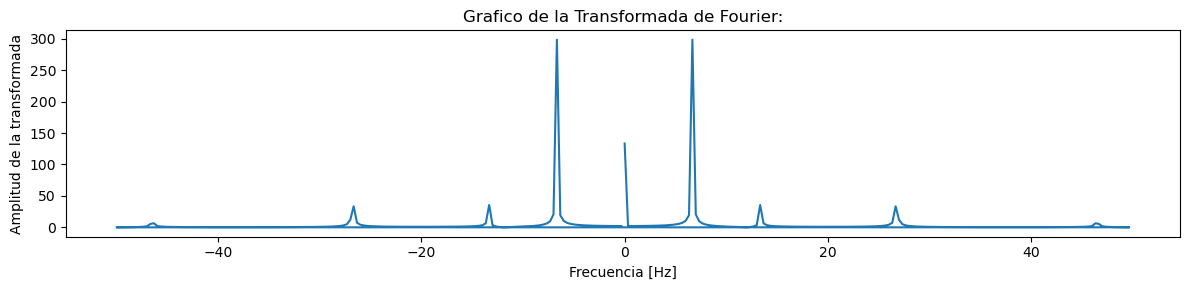

In [9]:
plt.figure(figsize=(12, 3))
plt.plot(freq_fft, np.abs(señal_creada_fft))
plt.title('Grafico de la Transformada de Fourier:')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud de la transformada')

plt.tight_layout()
plt.show()

* Ahora se definira la funcion fun_sampleo para graficar de manera mas facil:

In [10]:
def fun_sampleo(Fs):
    Ts = 1/Fs 
    return np.arange(0,10,Ts)

f_max = 7 
sampleo_caso1 = fun_sampleo(9)  ##    con   //  F_muestreo >>  F_max
sampleo_caso2 = fun_sampleo(15) ##    con   //  F_muestreo => 2*F_max 
sampleo_caso3 = fun_sampleo(35) ##    con   //  F_muestreo => 5*F_max

### 3.5.1-3.5.2 Grafico de señal original y sampleada con distintas frecuencias de muestreo:

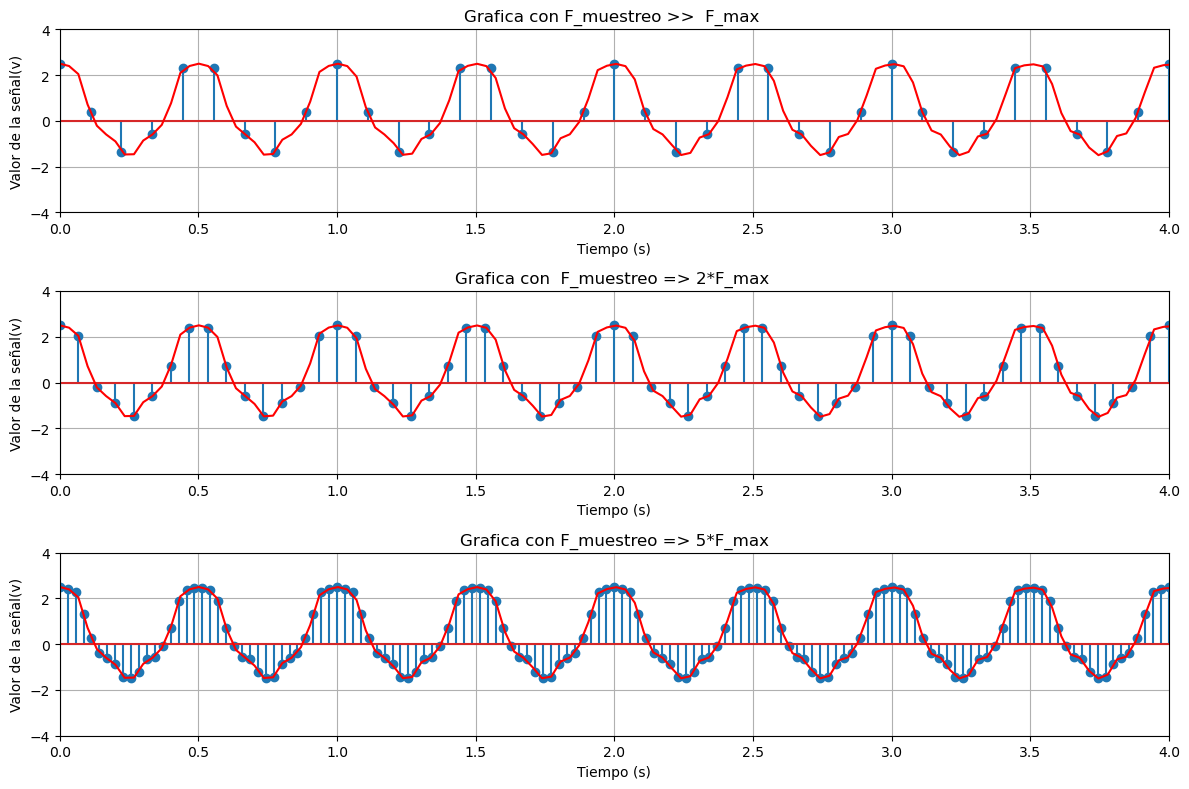

In [11]:
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
plt.title("Grafica con F_muestreo >>  F_max ")
plt.stem(sampleo_caso1,fun_ownsignal(sampleo_caso1,2))
plt.plot(t,fun_ownsignal(t,2),'r')
plt.ylabel("Valor de la señal(v)")
plt.xlabel("Tiempo (s)")
plt.ylim(-4,4)
plt.xlim(0,4)
plt.grid(True)

plt.subplot(3,1,2)
plt.title("Grafica con  F_muestreo => 2*F_max ")
plt.stem(sampleo_caso2,fun_ownsignal(sampleo_caso2,2))
plt.plot(t,fun_ownsignal(t,2),'r')
plt.ylabel("Valor de la señal(v)")
plt.xlabel("Tiempo (s)")
plt.ylim(-4,4)
plt.xlim(0,4)
plt.grid(True)

plt.subplot(3,1,3)
plt.title("Grafica con F_muestreo => 5*F_max")
plt.stem(sampleo_caso3,fun_ownsignal(sampleo_caso3,2))
plt.plot(t,fun_ownsignal(t,2),'r')
plt.ylabel("Valor de la señal(v)")
plt.xlabel("Tiempo (s)")
plt.ylim(-4,4)
plt.xlim(0,4)
plt.grid(True)

plt.tight_layout()
plt.show()

### 3.5.3 Señal reconstruida por el sampleo:

* Se utilizara la funcion plot para visualizar la reconstruccion a partir de la funcion discretizada.

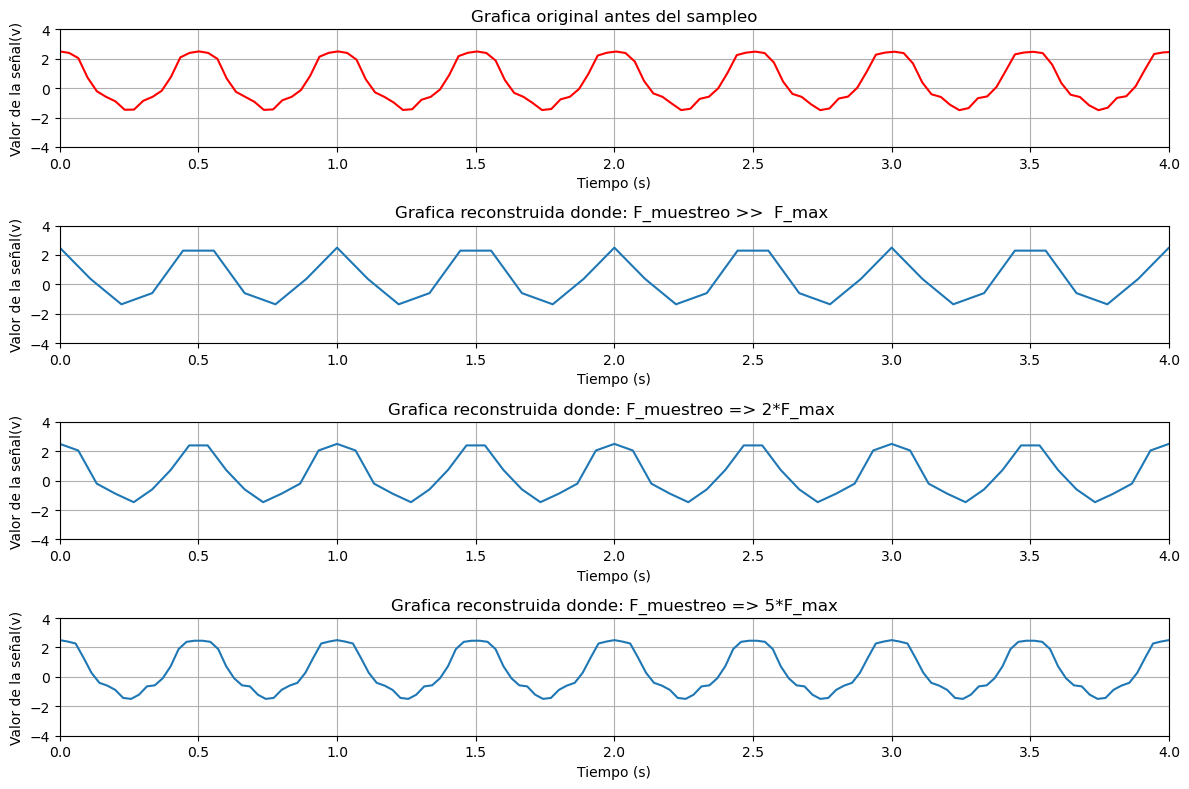

In [12]:
plt.figure(figsize=(12,8))
plt.subplot(4,1,1)
plt.title("Grafica original antes del sampleo")
plt.plot(t,fun_ownsignal(t,2),'r')
plt.ylabel("Valor de la señal(v)")
plt.xlabel("Tiempo (s)")
plt.ylim(-4,4)
plt.xlim(0,4)
plt.grid(True)

plt.subplot(4,1,2)
plt.title("Grafica reconstruida donde: F_muestreo >>  F_max ")
plt.plot(sampleo_caso1,fun_ownsignal(sampleo_caso1,2))
plt.ylabel("Valor de la señal(v)")
plt.xlabel("Tiempo (s)")
plt.ylim(-4,4)
plt.xlim(0,4)
plt.grid(True)

plt.subplot(4,1,3)
plt.title("Grafica reconstruida donde: F_muestreo => 2*F_max ")
plt.plot(sampleo_caso2,fun_ownsignal(sampleo_caso2,2))
plt.ylabel("Valor de la señal(v)")
plt.xlabel("Tiempo (s)")
plt.ylim(-4,4)
plt.xlim(0,4)
plt.grid(True)

plt.subplot(4,1,4)
plt.title("Grafica reconstruida donde: F_muestreo => 5*F_max")
plt.plot(sampleo_caso3,fun_ownsignal(sampleo_caso3,2))
plt.ylabel("Valor de la señal(v)")
plt.xlabel("Tiempo (s)")
plt.ylim(-4,4)
plt.xlim(0,4)
plt.grid(True)

plt.tight_layout()
plt.show()

### 3.6 Explica tus hallazgos

### 3.6 Conclusiones:

* Si bien el teorema de nyquist nos indica que la frecuencia de sampleo tiene que ser el doble de la frecuencia maxima, una recomendacion seria siempre utilizar un poco mas de el doble, de otra manera podria haber un tipo de aliassing en las bandas inferiores del espectro.

* Se pudo comprobar la importancia de la transformada de fourier para el analisis de señales, ya que no solo obtendremos la frecuencia maxima, sino que tambien sus bandas laterales.

## 4. Referencias
<p align="justify">
    

[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py